# Question 1 (1)
RK-4 Implementation in Simple Pendulum Problem with Animation

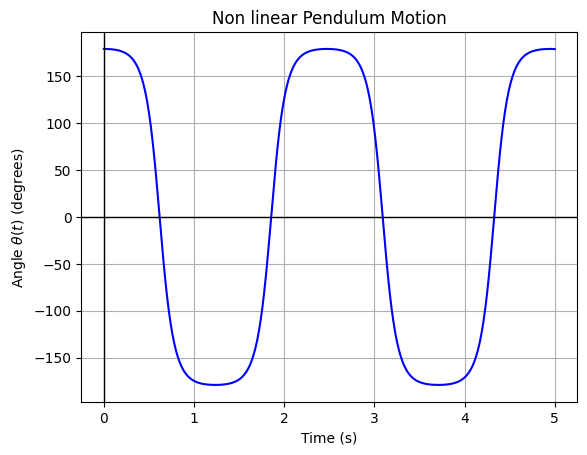

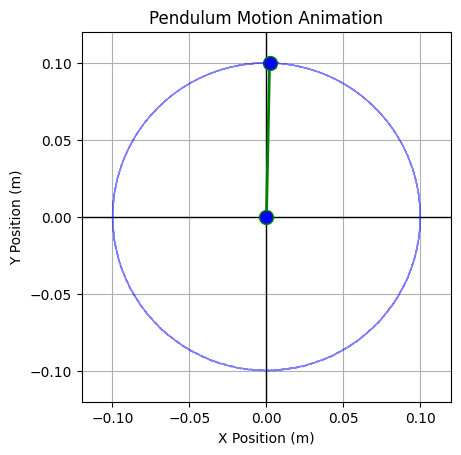

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

g=9.81                  #Acceleration due to gravity (m/s²)
l=0.1                   #Length of the pendulum (m)
theta0=np.radians(179)  #Initial angle (converted to radians) (numpy.sin() expects radians as input)
w0=0                    #Initial angular velocity

t0,tn,h=0,5,0.01  

def f_theta(t,theta,w):
    return w

def f_w(t,theta,w):
    return -(g/l)*np.sin(theta)

def RK4(funcs,t0,u0,tn,h):
    T=np.arange(t0,tn+h,h)
    R=np.zeros((len(T),len(u0)))
    R[0]=u0   
    for i in range(len(T)-1):
        t,u=T[i],R[i]
        k1=h*np.array([f(t,*u) for f in funcs])
        k2=h*np.array([f(t+h/2,*(u+k1/2)) for f in funcs])
        k3=h*np.array([f(t+h/2,*(u+k2/2)) for f in funcs])
        k4=h*np.array([f(t+h,*(u+k3)) for f in funcs])
        R[i+1]=u+(k1+2*k2+2*k3+k4)/6    
    return T,R[:,0],R[:,1]

functions=[f_theta,f_w]
T,Theta,W=RK4(functions,t0,[theta0,w0],tn,h)

plt.figure()
plt.plot(T,np.degrees(Theta),'b-')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle $\theta(t)$ (degrees)')
plt.title('Non linear Pendulum Motion')
plt.axhline(color='black',linewidth=1)
plt.axvline(color='black',linewidth=1)
plt.grid()
plt.show()


x=l*np.sin(Theta)   #Horizontal position of bob
y=-l*np.cos(Theta)  #Vertical position of bob

%matplotlib inline
#Plotting and making animation
plt.xlim(-l-0.02,l+0.02)  
plt.ylim(-l-0.02,l+0.02)  
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Pendulum Motion Animation")
plt.grid()

#Draw hinge
plt.plot(0,0,'ko',markersize=8)  
plt.axhline(0,color='black',linewidth=1)  
plt.axvline(0,color='black',linewidth=1)  

#Pendulum components
lines,=plt.plot([],[],'go-',lw=2,markersize=10,markerfacecolor='b')  #Plots (x,y) points of bob,'o-' ensures line connecting points with hinge later
trace,=plt.plot([],[],color='blue',linestyle='--',lw=1,alpha=0.5)    #Trace of bob's motion

#Trace storage
trace_x=[]        #Stores x positions of bob
trace_y=[]        #Stores y positions of bob

def next_frame(i):
    x_bob=x[i]  #Get current x position of bob from the list index wise
    y_bob=y[i]  #Get current y position of bob from the list index wise
    
    #Update pendulum rod and bob
    lines.set_data([0,x_bob],[0,y_bob])  #Connect hinge (0,0) to bob's position with line as initialized in intial plot
    
    #Update trace
    trace_x.append(x_bob)                #Append new x position to trace
    trace_y.append(y_bob)                #Append new y position to trace
    trace.set_data(trace_x,trace_y)      #Plots all the previous points and connects them with line
    
    return lines,trace  

#Set the aspect ratio
plt.gca().set_aspect('equal',adjustable='box')

ani=FuncAnimation(plt.gcf(),next_frame,frames=len(T),interval=10,blit=True)  #Create animation for duration of displaying len(T) points. interval is duration between each frame and frames is no of frames. From here we get framerate of the video that is being displayed with the execution of code
#display(HTML(ani.to_html5_video()))
#display(HTML(ani.to_jshtml()))

#Save animation to file with a certain framerate for the video file. Large dpi gives clearer plot
ani.save('/home/tux_blue/Desktop/GitHub/Computational-Physics-PG/Assignments/Assignment Lab 9/ipynb file/Q1_1_Pendulum_Animation.mp4',fps=100)
#plt.close()

# Question 1 (2)
Pendulum with driving force

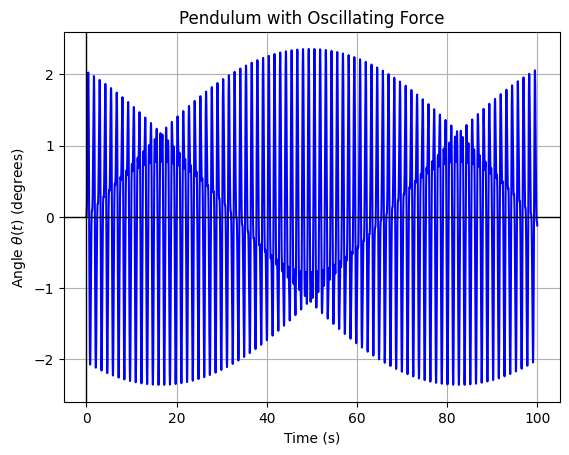

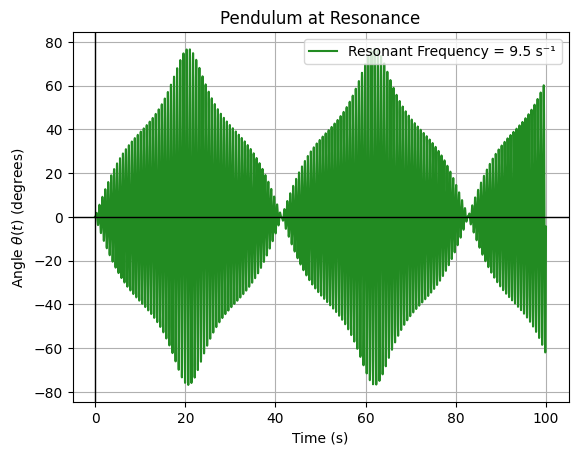

In [6]:
import numpy as np
import matplotlib.pyplot as plt

g=9.81      #Acceleration due to gravity (m/s²)
l=0.1       #Length of the pendulum (m)
C=2         #Constant for the oscillating force (s⁻²)
Omega=5     #Driving frequency (s⁻¹)

theta0,w0,t0,tn,h=0,0,0,100,0.001    

def f_theta(t,theta,w):
    return w

def f_w(t,theta,w):
    return -(g/l)*np.sin(theta)+C*np.cos(theta)*np.sin(Omega*t)

def RK4(funcs,t0,u0,tn,Omega,h):
    T=np.arange(t0,tn+h,h)
    R=np.zeros((len(T),len(u0)))
    R[0]=u0   
    for i in range(len(T)-1):
        t,u=T[i],R[i]
        k1=h*np.array([f(t,*u) for f in funcs])
        k2=h*np.array([f(t+h/2,*(u+k1/2)) for f in funcs])
        k3=h*np.array([f(t+h/2,*(u+k2/2)) for f in funcs])
        k4=h*np.array([f(t+h,*(u+k3)) for f in funcs])
        R[i+1]=u+(k1+2*k2+2*k3+k4)/6    
    return T,R[:,0],R[:,1]

functions=[f_theta,f_w]
T,Theta,W=RK4(functions,t0,[theta0,w0],tn,Omega,h)

plt.plot(T,np.degrees(Theta),'b-')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle $\theta(t)$ (degrees)')
plt.title(r'Pendulum with Oscillating Force')
plt.axhline(color='black',linewidth=1)
plt.axvline(color='black',linewidth=1)
plt.grid()
plt.show()


Omega_values=np.arange(8,11,0.1)  
max_amplitudes=[]

for Omega in Omega_values:         #have to have Omega as the variable name to update the global Omega defined earlier
    functions=[f_theta,f_w]
    T,Theta,W=RK4(functions,t0,[theta0,w0],tn,Omega,h)
    max_amplitude=np.max(np.abs(Theta))  
    max_amplitudes.append(max_amplitude)

Omega=Omega_values[np.argmax(max_amplitudes)]   #np.argmax() returns index of the max element  

functions=[f_theta,f_w]
T,Theta_max,W=RK4(functions,t0,[theta0,w0],tn,Omega,h)

plt.plot(T,np.degrees(Theta_max),color='forestgreen',label=f'Resonant Frequency = {Omega:0.1f} s⁻¹')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle $\theta(t)$ (degrees)')
plt.title('Pendulum at Resonance')
plt.axhline(color='black',linewidth=1)
plt.axvline(color='black',linewidth=1)
plt.grid()
plt.legend()
plt.show()

# Question 2 (1)
Projectile motion including air resistance

Distance traveled horizontally is : 242.3338677480838 m


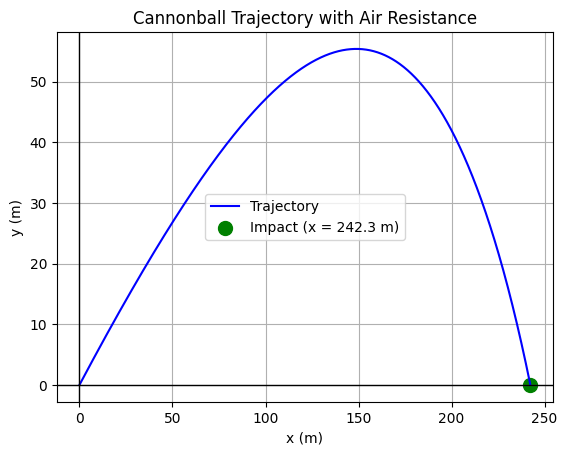

In [41]:
import numpy as np
import matplotlib.pyplot as plt

g=9.81                  #Accelerationduetogravity(m/s²)
m=1.0                   #Massofcannonball(kg)
R=0.08                  #Radiusofcannonball(m)
rho=1.22                #Densityofair(kg/m³)
C=0.47                  #Dragcoefficientforsphere
v0=100                  #Initialvelocity(m/s)
theta=np.radians(30)    #Launchangle(30degrees)

#Initialconditions
x0,y0=0,0    
vx0=v0*np.cos(theta)
vy0=v0*np.sin(theta)
t0,tn,h=0,20,0.0001

#Equationsofmotion
def fx(t,x,y,vx,vy):
    return vx

def fy(t,x,y,vx,vy):
    return vy

def fvx(t,x,y,vx,vy):
    v=np.sqrt(vx**2+vy**2)
    return -(np.pi*R**2*rho*C)/(2*m)*vx*v

def fvy(t,x,y,vx,vy):
    v=np.sqrt(vx**2+vy**2)
    return -g-(np.pi*R**2*rho*C)/(2*m)*vy*v

def RK4(funcs,t0,u0,tn,h):
    steps=int((tn-t0)/h)+2      #2 is used just as buffer
    T=np.zeros(steps)
    R=np.zeros((steps,len(u0)))
    R[0]=u0
    for i in range(len(T)-1):
        t,u=T[i],R[i]
        k1=h*np.array([f(t,*u) for f in funcs])
        k2=h*np.array([f(t+h/2,*(u+k1/2)) for f in funcs])
        k3=h*np.array([f(t+h/2,*(u+k2/2)) for f in funcs])
        k4=h*np.array([f(t+h,*(u+k3)) for f in funcs])
        R[i+1]=u+(k1+2*k2+2*k3+k4)/6
        T[i+1]=t+h
        if R[i+1,1]<=0:
            break
    T=T[0:i+1]
    R=R[0:i+1,:]
    return T,R[:,0],R[:,1],R[:,2],R[:,3]

functions=[fx,fy,fvx,fvy]
T,X,Y,Vx,Vy=RK4(functions,t0,[x0,y0,vx0,vy0],tn,h)
distance=X[-1]

print('Distance traveled horizontally is :',distance,'m')

plt.plot(X,Y,'b-',label='Trajectory')
plt.scatter(X[-1],Y[-1],color='green',s=100,label='Impact (x = {:0.1f} m)'.format(X[-1]))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Cannonball Trajectory with Air Resistance')
plt.axhline(color='black',linewidth=1)
plt.axvline(color='black',linewidth=1)
plt.legend()
plt.grid()
plt.show()

# Question 2 (2)
Relation b/w mass and distance travelled in projectile motion

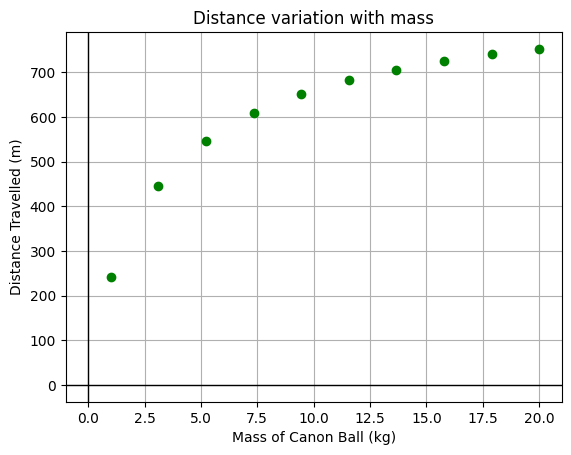

In [7]:
import numpy as np
import matplotlib.pyplot as plt

g=9.81                  #Accelerationduetogravity(m/s²)
R=0.08                  #Radiusofcannonball(m)
rho=1.22                #Densityofair(kg/m³)
C=0.47                  #Dragcoefficientforsphere
v0=100                  #Initialvelocity(m/s)
theta=np.radians(30)    #Launchangle(30degrees)

#Initialconditions
x0,y0=0,0    
vx0=v0*np.cos(theta)
vy0=v0*np.sin(theta)
t0,tn,h=0,20,0.0001

#Equationsofmotion
def fx(t,x,y,vx,vy):
    return vx

def fy(t,x,y,vx,vy):
    return vy

def fvx(t,x,y,vx,vy):
    v=np.sqrt(vx**2+vy**2)
    return -(np.pi*R**2*rho*C)/(2*m)*vx*v

def fvy(t,x,y,vx,vy):
    v=np.sqrt(vx**2+vy**2)
    return -g-(np.pi*R**2*rho*C)/(2*m)*vy*v

def RK4(funcs,t0,u0,tn,h):
    steps=int((tn-t0)/h)+2      #2 is used just as buffer
    T=np.zeros(steps)
    R=np.zeros((steps,len(u0)))
    R[0]=u0
    for i in range(len(T)-1):
        t,u=T[i],R[i]
        k1=h*np.array([f(t,*u) for f in funcs])
        k2=h*np.array([f(t+h/2,*(u+k1/2)) for f in funcs])
        k3=h*np.array([f(t+h/2,*(u+k2/2)) for f in funcs])
        k4=h*np.array([f(t+h,*(u+k3)) for f in funcs])
        R[i+1]=u+(k1+2*k2+2*k3+k4)/6
        T[i+1]=t+h
        if R[i+1,1]<=0:
            break
    T=T[0:i+1]
    R=R[0:i+1,:]
    return T,R[:,0],R[:,1],R[:,2],R[:,3]

masses=np.linspace(1,20,10)
distances=[]
for m in masses:
    functions=[fx,fy,fvx,fvy]
    T,X,Y,Vx,Vy=RK4(functions,t0,[x0,y0,vx0,vy0],tn,h)
    distances.append(X[-1])

plt.plot(masses,distances,'go')
plt.xlabel('Mass of Canon Ball (kg)')
plt.ylabel('Distance Travelled (m)')
plt.title('Distance variation with mass')
plt.axhline(color='black',linewidth=1)
plt.axvline(color='black',linewidth=1)
plt.grid()
plt.show()

# Question 3 (1)
Plotting comet orbit in astronomical scales using RK-4 Method
(This code is extremely sensitive to parameters taken. Apparent small deviation causes complete erronous solution)

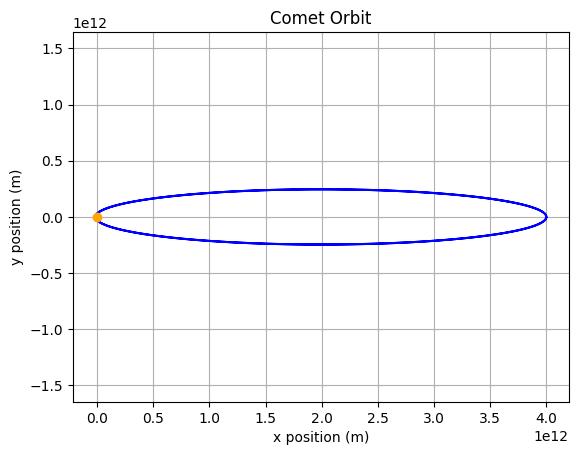

The orbital period is : 48.91618687060154 years


In [1]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67430e-11
M_sun=1.9885e30
GM=G*M_sun

#Initial conditions
x0=4e12  # 4 billion km = 4e12 m
y0=0
vx0=0
vy0=500

def dxdt(t,x,y,vx,vy):
    return vx

def dydt(t,x,y,vx,vy):
    return vy

def dvxdt(t,x,y,vx,vy):
    r=np.sqrt(x**2+y**2)
    return -GM*x/r**3

def dvydt(t,x,y,vx,vy):
    r=np.sqrt(x**2+y**2)
    return -GM*y/r**3

def rk4(funcs,t0,u0,tn,h):
    steps=int((tn-t0)/h)+1
    T=np.zeros(steps)
    R=np.zeros((steps,len(u0)))
    R[0]=u0
    for i in range(steps-1):
        t,u=T[i],R[i]
        k1=h*np.array([f(t,*u)for f in funcs])
        k2=h*np.array([f(t+h/2,*(u+k1/2))for f in funcs])
        k3=h*np.array([f(t+h/2,*(u+k2/2))for f in funcs])
        k4=h*np.array([f(t+h,*(u+k3))for f in funcs])
        R[i+1]=u+(k1+2*k2+2*k3+k4)/6
        T[i+1]=t+h
    return T,R


a=x0/2                                             #Assuming it to be Semi-major axis (m)
orbital_period=2*np.pi*np.sqrt(a**3/GM)            #Kepler's 3rd Law
tn=orbital_period*2

h=(365*24*3600)/10000                              #Order of 1 to 10 hours
functions=[dxdt,dydt,dvxdt,dvydt]
T,R=rk4(functions,0,[x0,y0,vx0,vy0],tn,h)
x,y=R[:,0],R[:,1]

plt.plot(x,y,'b-')
plt.plot(0,0,color='orange',marker='o',label="Sun",ms=6)
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Comet Orbit')
plt.grid()
plt.axis('equal')
plt.show()
print('The orbital period is :',orbital_period/(365*24*3600),'years')

# Question 3 (2)
Plotting comet orbit in astronomical scales using Adaptive RK-4 Method
(This code is very rigid to range of parameters taken)

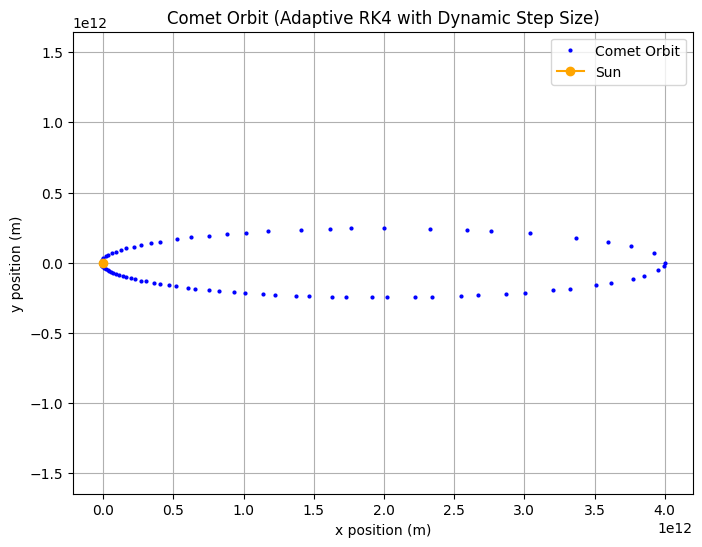

The orbital period is : 48.91618687060154 years


In [1]:
import numpy as np
import matplotlib.pyplot as plt


G=6.67430e-11  
M_sun=1.9885e30  
GM=G*M_sun

#Initial conditions
x0=4e12        # 4 billion km = 4e12 m
y0=0
vx0=0
vy0=500

def dxdt(t,x,y,vx,vy): 
    return vx
def dydt(t,x,y,vx,vy): 
    return vy
def dvxdt(t,x,y,vx,vy): 
    r=np.sqrt(x**2+y**2)
    return -GM*x/r**3
def dvydt(t,x,y,vx,vy): 
    r=np.sqrt(x**2+y**2)
    return -GM*y/r**3

def rk4_step(funcs,t,u,h):
    k1=h*np.array([f(t,*u) for f in funcs])
    k2=h*np.array([f(t+h/2,*(u+k1/2)) for f in funcs])
    k3=h*np.array([f(t+h/2,*(u+k2/2)) for f in funcs])
    k4=h*np.array([f(t+h,*(u+k3)) for f in funcs])
    return u+(k1+2*k2+2*k3+k4)/6

def adaptive_rk4(funcs,t0,u0,tn,h,tol=1e3):
    t=t0
    u=u0
    time=[t]
    trajectory=[u[0:2]]  # Store (x,y)

    while t<tn:                            # Compute two RK4 steps : one full step (h), two half-steps (h/2)        
        u1=rk4_step(funcs,t,u,h)
        u_half1=rk4_step(funcs,t,u,h/2)  
        u2=rk4_step(funcs,t+h/2,u_half1,h/2)  

        r1=np.sqrt((u1[0]-u[0])**2+(u1[1]-u[1])**2)  
        r2=np.sqrt((u2[0]-u[0])**2+(u2[1]-u[1])**2)  
        error=abs(r2-r1) 

        if error<tol/100:    #Accounts for the region where a big h produces small error
            h*=1.25  
        elif error>tol:      #Accounts for the region where a small h produces significant error
            h*=0.5  
        else:
            u=u2  
            t+=h
            time.append(t)
            trajectory.append(u[0:2])

    return np.array(time),np.array(trajectory)


a=x0/2                                   #Semi-major axis (m)
orbital_period=2*np.pi*np.sqrt(a**3/GM)  #Kepler's 3rd Law
tn=2*orbital_period  

#This h can be taken from a very tiny number to a very huge number, even 10**6 times more than tn. The proper h required will be automatically adjusted
h=(365*24*3600)/10000                    #Initial step size (52.56 mins)
functions=[dxdt,dydt,dvxdt,dvydt]


T,R=adaptive_rk4(functions,0,[x0,y0,vx0,vy0],tn,h)

# Extract (x,y) positions
x,y=R[:,0],R[:,1]

# Plot the orbit
plt.figure(figsize=(8,6))
plt.plot(x[::15],y[::15],'bo',label="Comet Orbit",ms=2)
plt.plot(0,0,color='orange',marker='o',label="Sun",ms=6)  
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("Comet Orbit (Adaptive RK4 with Dynamic Step Size)")
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
print('The orbital period is :',orbital_period/(365*24*3600),'years')